In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [5]:
import Go_tools

In [6]:
metadata = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv",
    index_col=0,
)
metadata = metadata.drop(
    columns=[
        "arb.sort",
        "sample-id",
        "Ambiguous Unstranded",
        "Ambiguous Forward",
        "Multimapping",
        "Unmapped Over Mapped",
    ]
)
metadata["Date and Time"] = metadata["date"] + " " + metadata["time"]
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata["Date and Time"] = pd.to_datetime(
    metadata["Date and Time"], format=luke_time_data_format
)

In [7]:
microbiome_abundance = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/Microbiome/lic2024_16S_rab.csv"
)
long_term_microbiome = microbiome_abundance.merge(
    metadata[["sampID", "Experiment Type"]], left_on="plantID", right_on="sampID"
)
long_term_microbiome

,Sample,sample.type,timepoint,date,time,platename,daysincestart,plantID,Kingdom,Phylum,Class,Order,Family,Genus,Species,AbundR100,sampID,Experiment Type
0,LIC522,plant,c1_t11,2/11/24,12:00,LICCIRC_02,102,LIC522,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales_A_650611,Pseudomonadaceae,Pseudomonas_E_647464,Pseudomonas_E_647464 viridiflava,79.1,LIC522,Circadian Experiment 1
1,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,66.1,LIC063,Long Term
2,LIC159,plant,t14,1/23/24,8:00,LIC_02,83,LIC159,d__Bacteria,Cyanobacteriota,Cyanobacteriia,Cyanobacteriales,Coleofasciculaceae,Caldora,Caldora sp010672925,60.5,LIC159,Long Term
3,LIC452,plant,c1_t06,2/10/24,16:00,LICCIRC_01,101,LIC452,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae_A_595421,Massilia_574544,Massilia atriviolacea,59.8,LIC452,Circadian Experiment 1
4,LIC306,plant,t26,3/8/24,8:00,LIC_04,128,LIC306,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,57.2,LIC306,Long Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12281,LIC122,plant,t11,12/15/23,8:00,LIC_02,44,LIC122,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Nocardioidaceae,Nocardioides_A_392796,Nocardioides_A_392796 hankookensis,0.5,LIC122,Long Term
12282,LIC028,plant,t03,11/14/23,8:00,LIC_01,13,LIC028,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Geodermatophilaceae,Modestobacter,Modestobacter muralis,0.5,LIC028,Long Term
12283,LIC631,plant,c2_t05,3/2/24,12:00,LICCIRC_03,122,LIC631,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Brevundimonas,Brevundimonas subvibrioides,0.5,LIC631,Circadian Experiment 2
12284,LIC629,plant,c2_t05,3/2/24,12:00,LICCIRC_03,122,LIC629,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales_505101,Rhizobiaceae,Agrobacterium,Agrobacterium larrymoorei,0.5,LIC629,Circadian Experiment 2


In [8]:
long_term_microbiome["sample.type"].unique()

array(['plant'], dtype=object)

In [9]:
# Quick peek at columns / IDs
print("rows:", len(long_term_microbiome))
print(
    "unique sampID:",
    (
        long_term_microbiome["sampID"].nunique()
        if "sampID" in long_term_microbiome.columns
        else "(no sampID col)"
    ),
)
print("columns:")
print(list(long_term_microbiome.columns))
long_term_microbiome.head()

rows: 12286
unique sampID: 372
columns:
['Sample', 'sample.type', 'timepoint', 'date', 'time', 'platename', 'daysincestart', 'plantID', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'AbundR100', 'sampID', 'Experiment Type']


,Sample,sample.type,timepoint,date,time,platename,daysincestart,plantID,Kingdom,Phylum,Class,Order,Family,Genus,Species,AbundR100,sampID,Experiment Type
0,LIC522,plant,c1_t11,2/11/24,12:00,LICCIRC_02,102,LIC522,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales_A_650611,Pseudomonadaceae,Pseudomonas_E_647464,Pseudomonas_E_647464 viridiflava,79.1,LIC522,Circadian Experiment 1
1,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,66.1,LIC063,Long Term
2,LIC159,plant,t14,1/23/24,8:00,LIC_02,83,LIC159,d__Bacteria,Cyanobacteriota,Cyanobacteriia,Cyanobacteriales,Coleofasciculaceae,Caldora,Caldora sp010672925,60.5,LIC159,Long Term
3,LIC452,plant,c1_t06,2/10/24,16:00,LICCIRC_01,101,LIC452,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae_A_595421,Massilia_574544,Massilia atriviolacea,59.8,LIC452,Circadian Experiment 1
4,LIC306,plant,t26,3/8/24,8:00,LIC_04,128,LIC306,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,57.2,LIC306,Long Term


In [10]:
def core_taxa_table(
    df: pd.DataFrame,
    tax_col: str,
    sample_col: str = "sampID",
    abundance_col: str = "AbundR100",
    core_threshold: float = 0.80,
    drop_unassigned: bool = True,
    unassigned_labels: tuple[str, ...] = ("unassigned", "na", "none", ""),
) -> pd.DataFrame:
    """Return a table of prevalence and core status for a given taxonomic rank.

        Prevalence is defined as:
    # unique samples where the taxon is present / total unique samples in df
    """
    if sample_col not in df.columns:
        raise KeyError(f"{sample_col!r} not found in df")
    if tax_col not in df.columns:
        raise KeyError(f"{tax_col!r} not found in df")

    total_samples = df[sample_col].dropna().nunique()
    if total_samples == 0:
        raise ValueError("No samples found in df; cannot compute prevalence")

    keep_cols = [sample_col, tax_col] + (
        [abundance_col] if abundance_col in df.columns else []
    )
    working = df[keep_cols].copy()

    # Preserve missing values while still allowing string ops like strip/lower
    working[tax_col] = working[tax_col].astype("string").str.strip()

    if drop_unassigned:
        # Drop missing/blank/unassigned labels (case-insensitive)
        labels = {s.casefold() for s in unassigned_labels}
        working = working[working[tax_col].notna()]
        series_cf = working[tax_col].str.casefold()
        working = working[~series_cf.isin(labels)]

    grouped = working.groupby(tax_col, dropna=False)
    out = grouped.agg(
        n_samples_present=(sample_col, "nunique"),
        mean_abundance_present=(
            (abundance_col, "mean")
            if abundance_col in working.columns
            else (sample_col, "size")
        ),
        median_abundance_present=(
            (abundance_col, "median")
            if abundance_col in working.columns
            else (sample_col, "size")
        ),
    ).reset_index()

    if abundance_col not in working.columns:
        out = out.rename(columns={"mean_abundance_present": "rows_present"})
        out = out.drop(columns=["median_abundance_present"], errors="ignore")

    out["prevalence"] = out["n_samples_present"] / total_samples
    out["core"] = out["prevalence"] > core_threshold
    out = out.sort_values(
        ["core", "prevalence", "n_samples_present"], ascending=[False, False, False]
    )
    out = out.reset_index(drop=True)
    return out

In [11]:
core_threshold = 0.80
tax_ranks = ["Species", "Genus", "Family", "Order"]

core_results = {}
for rank in tax_ranks:
    tbl = core_taxa_table(
        long_term_microbiome,
        tax_col=rank,
        sample_col="sampID",
        abundance_col="AbundR100",
        core_threshold=core_threshold,
        drop_unassigned=True,
    )
    core_tbl = tbl[tbl["core"]].copy()
    noncore_tbl = tbl[~tbl["core"]].copy()

    core_results[rank] = {"all": tbl, "core": core_tbl, "noncore": noncore_tbl}

    print(f"\n=== {rank} ===")
    print(f"Total taxa: {len(tbl)}")
    print(f"Core taxa (prevalence > {core_threshold:.0%}): {len(core_tbl)}")
    if len(core_tbl) > 0:
        display(core_tbl.head(25))
    else:
        print("(No core taxa at this rank)")


=== Species ===
Total taxa: 279
Core taxa (prevalence > 80%): 10


,Species,n_samples_present,mean_abundance_present,median_abundance_present,prevalence,core
0,Kordiimonas sp002401685,372,3.661053,3.30,1.000000,True
1,Sphingomonas_L_486704 sp000786205,372,17.954211,15.90,1.000000,True
2,Rhodoferax_C aquaticus,370,4.407143,3.70,0.994624,True
3,Neorhizobium soli,366,3.855080,2.25,0.983871,True
4,Klenkia sp001424455,363,3.581402,2.70,0.975806,True
5,Massilia atriviolacea,353,5.457064,3.10,0.948925,True
6,Variovorax paradoxus_C,340,2.968391,2.35,0.913978,True
7,Flavobacterium chilense,328,8.458333,4.80,0.881720,True
8,Sphingomonas_L_486704 taxi,319,1.840557,1.40,0.857527,True
9,Frigoribacterium sp001424645,298,2.820328,1.50,0.801075,True



=== Genus ===
Total taxa: 149
Core taxa (prevalence > 80%): 11


,Genus,n_samples_present,mean_abundance_present,median_abundance_present,prevalence,core
0,Kordiimonas,372,3.661053,3.30,1.000000,True
1,Sphingomonas_L_486704,372,4.410876,1.20,1.000000,True
2,Rhodoferax_C,370,4.382461,3.70,0.994624,True
3,Neorhizobium_500197,366,3.855080,2.25,0.983871,True
4,Klenkia,363,3.581402,2.70,0.975806,True
5,Massilia_574544,353,5.457064,3.10,0.948925,True
6,Pseudomonas_E_647464,353,3.288490,1.20,0.948925,True
7,Flavobacterium,343,5.520786,2.30,0.922043,True
8,Nocardioides_A_392796,342,1.014079,0.80,0.919355,True
9,Variovorax,340,2.968391,2.35,0.913978,True



=== Family ===
Total taxa: 44
Core taxa (prevalence > 80%): 9


,Family,n_samples_present,mean_abundance_present,median_abundance_present,prevalence,core
0,Burkholderiaceae_A_595421,372,2.638060,1.3,1.000000,True
1,Kordiimonadaceae,372,3.661053,3.3,1.000000,True
2,Sphingomonadaceae_486827,372,4.355217,1.2,1.000000,True
3,Rhizobiaceae,370,2.668857,1.5,0.994624,True
4,Geodermatophilaceae,368,2.688612,1.7,0.989247,True
5,Pseudomonadaceae,361,3.127332,1.2,0.970430,True
6,Nocardioidaceae,344,0.995878,0.8,0.924731,True
7,Flavobacteriaceae,343,5.520786,2.3,0.922043,True
8,Microbacteriaceae,339,1.954448,1.0,0.911290,True



=== Order ===
Total taxa: 23
Core taxa (prevalence > 80%): 8


,Order,n_samples_present,mean_abundance_present,median_abundance_present,prevalence,core
0,Burkholderiales,372,2.570784,1.3,1.000000,True
1,Sphingomonadales,372,4.255375,1.5,1.000000,True
2,Rhizobiales_505101,370,2.190275,1.1,0.994624,True
3,Mycobacteriales,368,1.758644,0.9,0.989247,True
4,Pseudomonadales_A_650611,361,3.127332,1.2,0.970430,True
5,Actinomycetales,356,1.707529,0.9,0.956989,True
6,Flavobacteriales_B_877923,353,5.038866,2.0,0.948925,True
7,Propionibacteriales,345,0.986347,0.8,0.927419,True


In [12]:
# Core size as a function of required samples-present threshold
total_samples = long_term_microbiome["sampID"].dropna().nunique()
thresholds = np.arange(0, total_samples + 1)  # required #samples present

# If you ever want strict ">" semantics instead of ">=", flip this to True
strictly_greater_than_threshold = False

rank_tables = {}
for rank in tax_ranks:
    # Prefer the already-computed tables, but fall back if needed
    tbl = None
    if (
        "core_results" in globals()
        and rank in core_results
        and "all" in core_results[rank]
    ):
        tbl = core_results[rank]["all"]
    else:
        tbl = core_taxa_table(
            long_term_microbiome, tax_col=rank, core_threshold=core_threshold
        )
    rank_tables[rank] = tbl

core_count_curve = pd.DataFrame({"required_n_samples": thresholds})
core_count_curve["required_prevalence"] = (
    core_count_curve["required_n_samples"] / total_samples
)

for rank, tbl in rank_tables.items():
    present_counts = tbl["n_samples_present"].to_numpy()
    if strictly_greater_than_threshold:
        counts = np.array([(present_counts > t).sum() for t in thresholds], dtype=int)
    else:
        counts = np.array([(present_counts >= t).sum() for t in thresholds], dtype=int)
    core_count_curve[f"n_{rank.lower()}_core"] = counts

core_count_curve

,required_n_samples,required_prevalence,n_species_core,n_genus_core,n_family_core,n_order_core
0,0,0.000000,279,149,44,23
1,1,0.002688,279,149,44,23
2,2,0.005376,217,117,40,19
3,3,0.008065,188,106,38,18
4,4,0.010753,167,96,36,16
...,...,...,...,...,...,...
368,368,0.989247,3,3,5,4
369,369,0.991935,3,3,4,3
370,370,0.994624,3,3,4,3
371,371,0.997312,2,2,3,2


In [13]:
melted_core_count = core_count_curve[
    [
        "required_prevalence",
        "n_species_core",
        "n_genus_core",
        "n_family_core",
        "n_order_core",
    ]
].melt(
    id_vars="required_prevalence",
)

In [14]:
melted_core_count

,required_prevalence,variable,value
0,0.000000,n_species_core,279
1,0.002688,n_species_core,279
2,0.005376,n_species_core,217
3,0.008065,n_species_core,188
4,0.010753,n_species_core,167
...,...,...,...
1487,0.989247,n_order_core,4
1488,0.991935,n_order_core,3
1489,0.994624,n_order_core,3
1490,0.997312,n_order_core,2


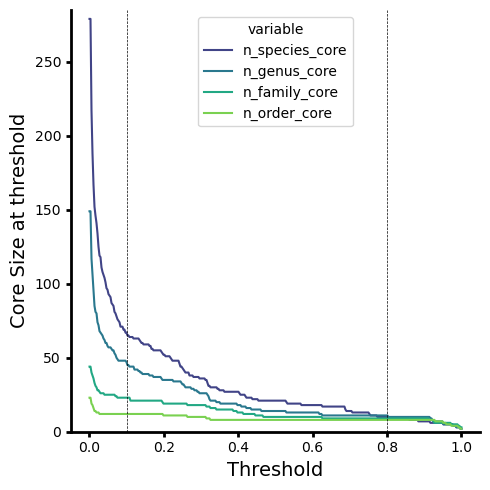

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.lineplot(
    data=melted_core_count,
    x="required_prevalence",
    y="value",
    hue="variable",
    palette="viridis",
)
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("Core Size at threshold", fontsize=14)
sns.despine()
# ax.grid(False)
plt.axvline(0.1, color="k", linestyle="dashed", linewidth=0.5)
plt.axvline(0.8, color="k", linestyle="dashed", linewidth=0.5)
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
plt.ylim((0, 285))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=10,
)  # rotation=90
plt.yticks(fontsize=10)

# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

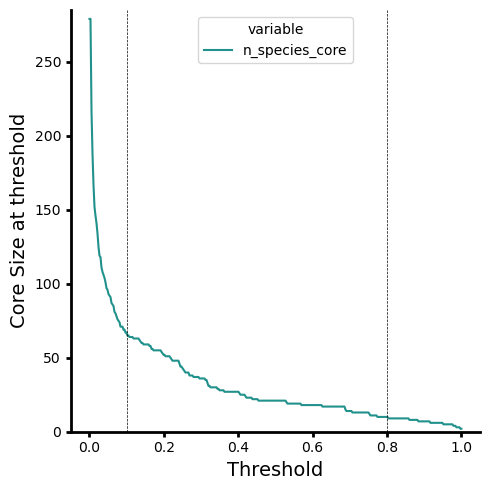

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.lineplot(
    data=melted_core_count.loc[melted_core_count["variable"] == "n_species_core"],
    x="required_prevalence",
    y="value",
    hue="variable",
    palette="viridis",
)
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("Core Size at threshold", fontsize=14)
sns.despine()
# ax.grid(False)
plt.axvline(0.1, color="k", linestyle="dashed", linewidth=0.5)
plt.axvline(0.8, color="k", linestyle="dashed", linewidth=0.5)
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
plt.ylim((0, 285))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=10,
)  # rotation=90
plt.yticks(fontsize=10)

# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

In [17]:
#### Questions: When do rare species show up? Are they evenly distributed or do they all show up late?

In [18]:
species_core_results = core_results["Species"]["all"]
species_core_results

,Species,n_samples_present,mean_abundance_present,median_abundance_present,prevalence,core
0,Kordiimonas sp002401685,372,3.661053,3.30,1.000000,True
1,Sphingomonas_L_486704 sp000786205,372,17.954211,15.90,1.000000,True
2,Rhodoferax_C aquaticus,370,4.407143,3.70,0.994624,True
3,Neorhizobium soli,366,3.855080,2.25,0.983871,True
4,Klenkia sp001424455,363,3.581402,2.70,0.975806,True
...,...,...,...,...,...,...
274,Tardiphaga robiniae,1,0.500000,0.50,0.002688,False
275,Telluria timonae,1,10.800000,10.80,0.002688,False
276,UBA4416 sp002420145,1,0.700000,0.70,0.002688,False
277,Umezawaea tangerina,1,1.100000,1.10,0.002688,False


In [19]:
species_core_results.to_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Generated_data/species_core_results.csv",
    index=False,
)

In [34]:
rare_species = species_core_results.loc[species_core_results["prevalence"] < 0.1]
rare_species

,Species,n_samples_present,mean_abundance_present,median_abundance_present,prevalence,core
65,Bradyrhizobium sp000938255,37,0.771053,0.7,0.099462,False
66,Noviherbaspirillum_A_568104 psychrotolerans,37,0.832432,0.7,0.099462,False
67,Brevundimonas huaxiensis,35,1.822222,0.7,0.094086,False
68,Mycobacterium paragordonae,35,0.608333,0.6,0.094086,False
69,Aeromicrobium sp001426485,33,0.865714,0.7,0.088710,False
...,...,...,...,...,...,...
274,Tardiphaga robiniae,1,0.500000,0.5,0.002688,False
275,Telluria timonae,1,10.800000,10.8,0.002688,False
276,UBA4416 sp002420145,1,0.700000,0.7,0.002688,False
277,Umezawaea tangerina,1,1.100000,1.1,0.002688,False


In [37]:
# Count rare species observed at each timepoint
rare_species_set = set(rare_species["Species"].dropna().astype(str))

# Filter long_term_microbiome down to rare species rows (these rows imply presence)
rare_occurrences = long_term_microbiome.loc[
    long_term_microbiome["Species"].astype(str).isin(rare_species_set),
    ["sampID", "timepoint", "date", "Species", "AbundR100"],
].copy()

# Summarize by timepoint
rare_species_by_timepoint = (
    rare_occurrences.groupby("timepoint", dropna=False)
    .agg(
        n_samples=("sampID", "nunique"),
        n_unique_rare_species=("Species", "nunique"),
        n_rare_occurrences=("Species", "size"),
        first_date=("date", "min"),
        last_date=("date", "max"),
    )
    .reset_index()
    .sort_values("timepoint")
    .reset_index(drop=True)
)

rare_species_by_timepoint

,timepoint,n_samples,n_unique_rare_species,n_rare_occurrences,first_date,last_date
0,c1_t01,7,30,32,2/9/24,2/9/24
1,c1_t02,7,22,26,2/10/24,2/10/24
2,c1_t03,8,13,16,2/10/24,2/10/24
3,c1_t04,6,14,15,2/10/24,2/10/24
4,c1_t05,6,20,24,2/10/24,2/10/24
5,c1_t06,7,16,16,2/10/24,2/10/24
6,c1_t07,7,21,26,2/10/24,2/10/24
7,c1_t08,8,19,48,2/11/24,2/11/24
8,c1_t09,6,28,31,2/11/24,2/11/24
9,c1_t10,7,15,17,2/11/24,2/11/24


In [20]:
# Get core species from pre-computed results
core_species = core_results["Species"]["core"]
core_species_set = set(core_species["Species"].dropna().astype(str))

# For each sample, find which core species are present
sample_species = (
    long_term_microbiome.loc[
        long_term_microbiome["Species"].astype(str).isin(core_species_set),
        ["sampID", "timepoint", "date", "Species"],
    ]
    .drop_duplicates()
    .copy()
)

# Get all unique samples with their timepoints
all_samples = long_term_microbiome[["sampID", "timepoint", "date"]].drop_duplicates()

# For each sample, count how many core species are missing
n_core = len(core_species_set)
sample_core_counts = sample_species.groupby("sampID")["Species"].nunique().reset_index()
sample_core_counts.columns = ["sampID", "n_core_present"]

# Merge with all samples to get timepoint info
sample_core_summary = all_samples.merge(sample_core_counts, on="sampID", how="left")
sample_core_summary["n_core_present"] = (
    sample_core_summary["n_core_present"].fillna(0).astype(int)
)
sample_core_summary["n_core_missing"] = n_core - sample_core_summary["n_core_present"]
sample_core_summary["missing_any_core"] = sample_core_summary["n_core_missing"] > 0

# Summarize by timepoint
missing_core_by_timepoint = (
    sample_core_summary.groupby("timepoint", dropna=False)
    .agg(
        n_samples=("sampID", "nunique"),
        n_samples_missing_any_core=("missing_any_core", "sum"),
        total_core_missing=("n_core_missing", "sum"),
        mean_core_missing=("n_core_missing", "mean"),
        first_date=("date", "min"),
        last_date=("date", "max"),
    )
    .reset_index()
    .sort_values("timepoint")
    .reset_index(drop=True)
)

print(f"Total core species (prevalence > {core_threshold:.0%}): {n_core}")
missing_core_by_timepoint

Total core species (prevalence > 80%): 10


,timepoint,n_samples,n_samples_missing_any_core,total_core_missing,mean_core_missing,first_date,last_date
0,c1_t01,8,3,4,0.500000,2/9/24,2/9/24
1,c1_t02,8,0,0,0.000000,2/10/24,2/10/24
2,c1_t03,8,1,1,0.125000,2/10/24,2/10/24
3,c1_t04,8,3,3,0.375000,2/10/24,2/10/24
4,c1_t05,8,3,4,0.500000,2/10/24,2/10/24
5,c1_t06,8,3,4,0.500000,2/10/24,2/10/24
6,c1_t07,8,5,5,0.625000,2/10/24,2/10/24
7,c1_t08,8,4,5,0.625000,2/11/24,2/11/24
8,c1_t09,8,4,5,0.625000,2/11/24,2/11/24
9,c1_t10,8,2,2,0.250000,2/11/24,2/11/24


In [40]:
long_run_data = rare_species_by_timepoint.loc[
    ~rare_species_by_timepoint["timepoint"].str.contains("_")
]
long_run_data["timepoint plotter"] = (
    long_run_data["timepoint"].str.strip("t").astype(int)
)
long_run_data

/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_50912/2250702114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_run_data["timepoint plotter"] = (


,timepoint,n_samples,n_unique_rare_species,n_rare_occurrences,first_date,last_date,timepoint plotter
19,t01,8,59,92,11/1/23,11/1/23,1
20,t02,7,55,90,11/7/23,11/7/23,2
21,t03,8,40,57,11/14/23,11/14/23,3
22,t04,8,27,34,11/17/23,11/17/23,4
23,t05,8,54,70,11/21/23,11/21/23,5
24,t06,7,44,57,11/28/23,11/28/23,6
25,t07,8,42,57,12/1/23,12/1/23,7
26,t08,8,39,49,12/5/23,12/5/23,8
27,t09,8,37,68,12/8/23,12/8/23,9
28,t10,6,17,25,12/12/23,12/12/23,10


In [27]:
# Summarize rare species abundance by timepoint
rare_abundance_by_timepoint = (
    rare_occurrences.groupby("timepoint", dropna=False)
    .agg(
        n_samples=("sampID", "nunique"),
        n_unique_rare_species=("Species", "nunique"),
        n_rare_occurrences=("Species", "size"),
        total_rare_abundance=("AbundR100", "sum"),
        mean_rare_abundance=("AbundR100", "mean"),
        first_date=("date", "min"),
        last_date=("date", "max"),
    )
    .reset_index()
    .sort_values("timepoint")
    .reset_index(drop=True)
)

# Filter to long-run timepoints (no underscore in timepoint name)
long_run_rare_abundance = rare_abundance_by_timepoint.loc[
    ~rare_abundance_by_timepoint["timepoint"].str.contains("_")
].copy()
long_run_rare_abundance["timepoint plotter"] = (
    long_run_rare_abundance["timepoint"].str.strip("t").astype(int)
)
long_run_rare_abundance

,timepoint,n_samples,n_unique_rare_species,n_rare_occurrences,total_rare_abundance,mean_rare_abundance,first_date,last_date,timepoint plotter
19,t01,8,59,92,129.9,1.411957,11/1/23,11/1/23,1
20,t02,7,55,90,108.5,1.205556,11/7/23,11/7/23,2
21,t03,8,40,57,81.9,1.436842,11/14/23,11/14/23,3
22,t04,8,27,34,38.0,1.117647,11/17/23,11/17/23,4
23,t05,8,54,70,90.4,1.291429,11/21/23,11/21/23,5
24,t06,7,44,57,68.9,1.208772,11/28/23,11/28/23,6
25,t07,8,42,57,68.3,1.198246,12/1/23,12/1/23,7
26,t08,8,39,49,46.2,0.942857,12/5/23,12/5/23,8
27,t09,8,37,68,72.7,1.069118,12/8/23,12/8/23,9
28,t10,6,17,25,22.8,0.912000,12/12/23,12/12/23,10


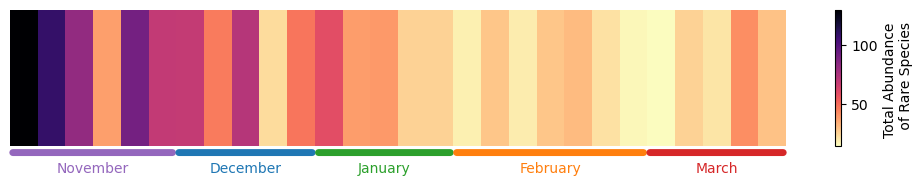

In [29]:
data = long_run_rare_abundance["total_rare_abundance"].to_numpy()

fig, ax = plt.subplots(figsize=(10, 2))

# Create the stripes using imshow
# cmap='RdBu_r' is the standard blue-to-red climate palette
img = ax.imshow(data[np.newaxis, :], cmap="magma_r", aspect="auto")
plt.colorbar(img, label="Total Abundance \n of Rare Species")
# Remove axes for the clean "stripes" look
ax.set_axis_off()
# ax.yaxis.set_visible(False)


def add_span_label(ax, start, end, label, y_pos=-0.05, color="red"):
    ax.annotate(
        "",
        xy=(start, y_pos),
        xycoords="axes fraction",
        xytext=(end, y_pos),
        textcoords="axes fraction",
        arrowprops=dict(arrowstyle="-", color=color, lw=5),
    )
    ax.text(
        (start + end) / 2,
        y_pos - 0.15,
        label,
        transform=ax.transAxes,
        ha="center",
        color=color,
    )


add_span_label(ax, 0, 0.213, "November", color="tab:purple")
add_span_label(ax, 0.214, 0.393, "December", color="tab:blue")
add_span_label(ax, 0.394, 0.571, "January", color="tab:green")
add_span_label(ax, 0.572, 0.82, "February", color="tab:orange")
add_span_label(ax, 0.821, 1, "March", color="tab:red")

plt.tight_layout()

plt.show()

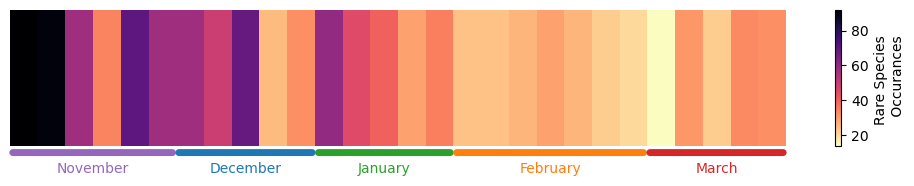

In [ ]:
data = long_run_data["n_rare_occurrences"].to_numpy()

fig, ax = plt.subplots(figsize=(10, 2))

# Create the stripes using imshow
# cmap='RdBu_r' is the standard blue-to-red climate palette
img = ax.imshow(data[np.newaxis, :], cmap="magma_r", aspect="auto")
plt.colorbar(img, label="Rare Species \n Occurances")
# Remove axes for the clean "stripes" look
ax.set_axis_off()
# ax.yaxis.set_visible(False)


def add_span_label(ax, start, end, label, y_pos=-0.05, color="red"):
    ax.annotate(
        "",
        xy=(start, y_pos),
        xycoords="axes fraction",
        xytext=(end, y_pos),
        textcoords="axes fraction",
        arrowprops=dict(arrowstyle="-", color=color, lw=5),
    )
    ax.text(
        (start + end) / 2,
        y_pos - 0.15,
        label,
        transform=ax.transAxes,
        ha="center",
        color=color,
    )


add_span_label(ax, 0, 0.213, "November", color="tab:purple")
add_span_label(ax, 0.214, 0.393, "December", color="tab:blue")
add_span_label(ax, 0.394, 0.571, "January", color="tab:green")
add_span_label(ax, 0.572, 0.82, "February", color="tab:orange")
add_span_label(ax, 0.821, 1, "March", color="tab:red")

plt.tight_layout()

plt.show()

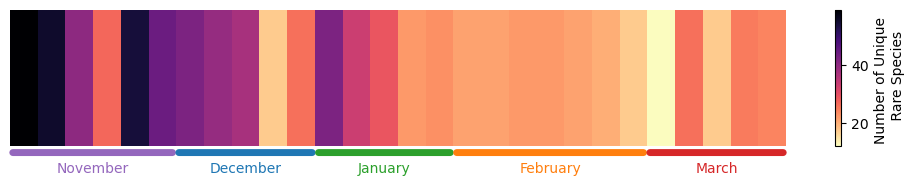

In [143]:
data = long_run_data["n_unique_rare_species"].to_numpy()

fig, ax = plt.subplots(figsize=(10, 2))

# Create the stripes using imshow
# cmap='RdBu_r' is the standard blue-to-red climate palette
img = ax.imshow(data[np.newaxis, :], cmap="magma_r", aspect="auto")
plt.colorbar(img, label="Number of Unique \n Rare Species")
# Remove axes for the clean "stripes" look
ax.set_axis_off()
# ax.yaxis.set_visible(False)


def add_span_label(ax, start, end, label, y_pos=-0.05, color="red"):
    ax.annotate(
        "",
        xy=(start, y_pos),
        xycoords="axes fraction",
        xytext=(end, y_pos),
        textcoords="axes fraction",
        arrowprops=dict(arrowstyle="-", color=color, lw=5),
    )
    ax.text(
        (start + end) / 2,
        y_pos - 0.15,
        label,
        transform=ax.transAxes,
        ha="center",
        color=color,
    )


add_span_label(ax, 0, 0.213, "November", color="tab:purple")
add_span_label(ax, 0.214, 0.393, "December", color="tab:blue")
add_span_label(ax, 0.394, 0.571, "January", color="tab:green")
add_span_label(ax, 0.572, 0.82, "February", color="tab:orange")
add_span_label(ax, 0.821, 1, "March", color="tab:red")

plt.tight_layout()

plt.show()

In [72]:
long_run_data

,timepoint,n_samples,n_unique_rare_species,n_rare_occurrences,first_date,last_date,timepoint plotter
19,t01,8,59,92,11/1/23,11/1/23,1
20,t02,7,55,90,11/7/23,11/7/23,2
21,t03,8,40,57,11/14/23,11/14/23,3
22,t04,8,27,34,11/17/23,11/17/23,4
23,t05,8,54,70,11/21/23,11/21/23,5
24,t06,7,44,57,11/28/23,11/28/23,6
25,t07,8,42,57,12/1/23,12/1/23,7
26,t08,8,39,49,12/5/23,12/5/23,8
27,t09,8,37,68,12/8/23,12/8/23,9
28,t10,6,17,25,12/12/23,12/12/23,10


In [21]:
long_run_core_data = missing_core_by_timepoint.loc[
    ~missing_core_by_timepoint["timepoint"].str.contains("_")
]
long_run_core_data["timepoint plotter"] = (
    long_run_core_data["timepoint"].str.strip("t").astype(int)
)
long_run_core_data

/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_3098/44861228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_run_core_data["timepoint plotter"] = (


,timepoint,n_samples,n_samples_missing_any_core,total_core_missing,mean_core_missing,first_date,last_date,timepoint plotter
19,t01,8,6,12,1.500,11/1/23,11/1/23,1
20,t02,8,6,13,1.625,11/7/23,11/7/23,2
21,t03,8,5,9,1.125,11/14/23,11/14/23,3
22,t04,8,8,18,2.250,11/17/23,11/17/23,4
23,t05,8,7,21,2.625,11/21/23,11/21/23,5
24,t06,8,4,7,0.875,11/28/23,11/28/23,6
25,t07,8,3,4,0.500,12/1/23,12/1/23,7
26,t08,8,3,3,0.375,12/5/23,12/5/23,8
27,t09,8,5,9,1.125,12/8/23,12/8/23,9
28,t10,8,6,12,1.500,12/12/23,12/12/23,10


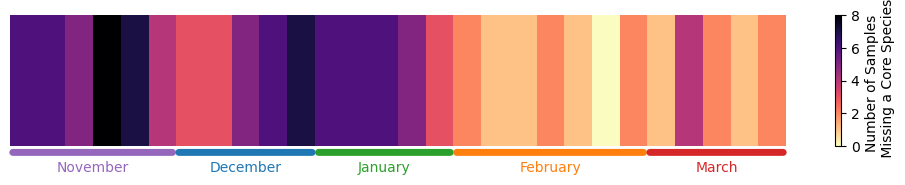

In [32]:
data = long_run_core_data["n_samples_missing_any_core"].to_numpy()

fig, ax = plt.subplots(figsize=(10, 2))

# Create the stripes using imshow
# cmap='RdBu_r' is the standard blue-to-red climate palette
img = ax.imshow(data[np.newaxis, :], cmap="magma_r", aspect="auto")
plt.colorbar(img, label="Number of Samples \n Missing a Core Species")
# Remove axes for the clean "stripes" look
ax.set_axis_off()
# ax.yaxis.set_visible(False)


def add_span_label(ax, start, end, label, y_pos=-0.05, color="red"):
    ax.annotate(
        "",
        xy=(start, y_pos),
        xycoords="axes fraction",
        xytext=(end, y_pos),
        textcoords="axes fraction",
        arrowprops=dict(arrowstyle="-", color=color, lw=5),
    )
    ax.text(
        (start + end) / 2,
        y_pos - 0.15,
        label,
        transform=ax.transAxes,
        ha="center",
        color=color,
    )


add_span_label(ax, 0, 0.213, "November", color="tab:purple")
add_span_label(ax, 0.214, 0.393, "December", color="tab:blue")
add_span_label(ax, 0.394, 0.571, "January", color="tab:green")
add_span_label(ax, 0.572, 0.82, "February", color="tab:orange")
add_span_label(ax, 0.821, 1, "March", color="tab:red")

plt.tight_layout()

plt.show()

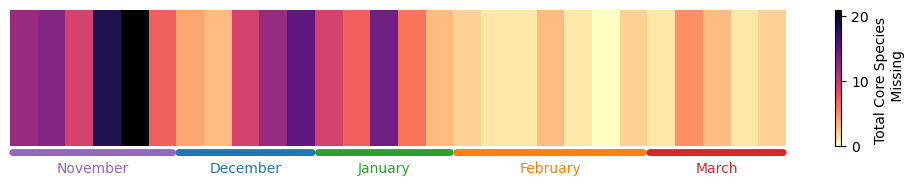

In [33]:
data = long_run_core_data["total_core_missing"].to_numpy()

fig, ax = plt.subplots(figsize=(10, 2))

# Create the stripes using imshow
# cmap='RdBu_r' is the standard blue-to-red climate palette
img = ax.imshow(data[np.newaxis, :], cmap="magma_r", aspect="auto")
plt.colorbar(img, label="Total Core Species \n Missing")
# Remove axes for the clean "stripes" look
ax.set_axis_off()
# ax.yaxis.set_visible(False)


def add_span_label(ax, start, end, label, y_pos=-0.05, color="red"):
    ax.annotate(
        "",
        xy=(start, y_pos),
        xycoords="axes fraction",
        xytext=(end, y_pos),
        textcoords="axes fraction",
        arrowprops=dict(arrowstyle="-", color=color, lw=5),
    )
    ax.text(
        (start + end) / 2,
        y_pos - 0.15,
        label,
        transform=ax.transAxes,
        ha="center",
        color=color,
    )


add_span_label(ax, 0, 0.213, "November", color="tab:purple")
add_span_label(ax, 0.214, 0.393, "December", color="tab:blue")
add_span_label(ax, 0.394, 0.571, "January", color="tab:green")
add_span_label(ax, 0.572, 0.82, "February", color="tab:orange")
add_span_label(ax, 0.821, 1, "March", color="tab:red")

plt.tight_layout()

plt.show()

In [ ]:
## I want to plot a barcode plot of this in python and add month markers at bottom